In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython import display
pd.set_option('display.max_columns',None)

from scipy.stats import shapiro,kstest,normaltest

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import LabelEncoder

import json

import pickle


## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

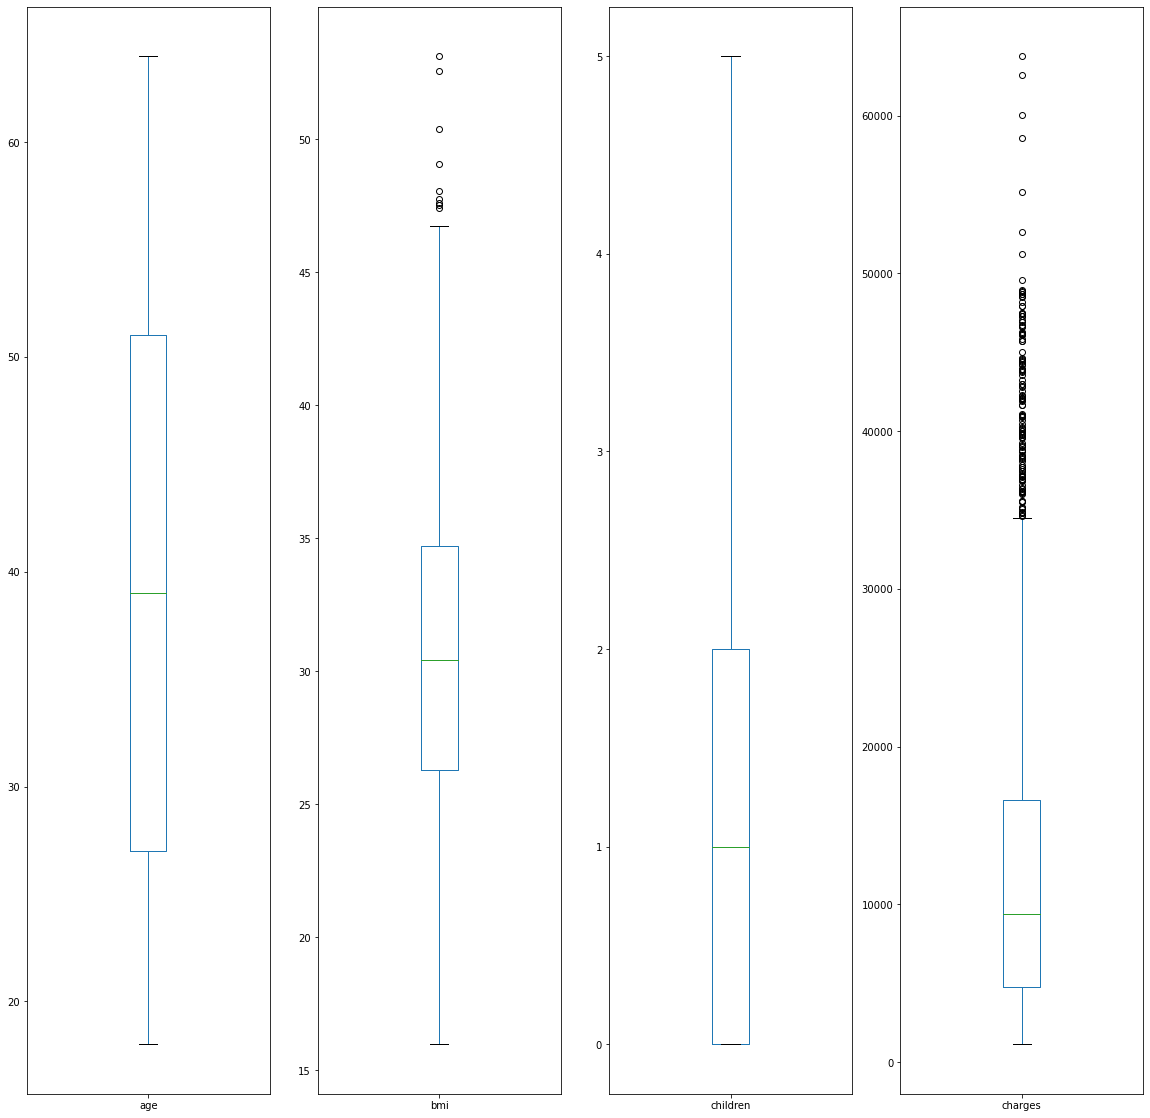

In [10]:
df.plot(kind='box',subplots=True,figsize=(20,20))
plt.show()

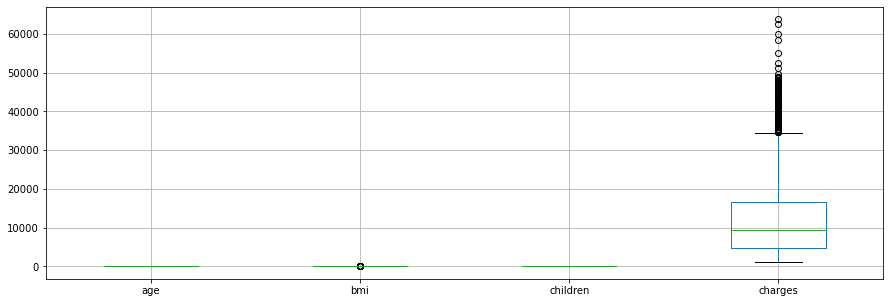

In [11]:
plt.figure(figsize=(15,5))
df.boxplot()

## Feature Engineering :

## 1. age

In [12]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

## 2. sex 

In [13]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex'].replace({'female':0, 'male':1},inplace=True)

In [15]:
sex_col = {'female':0, 'male':1}
sex_col

{'female': 0, 'male': 1}

## 3. bmi

In [16]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

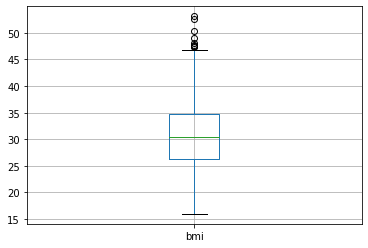

In [17]:
df[['bmi']].boxplot()

In [18]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)

IQR = q3 - q1
m = df['bmi'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

47.290000000000006
13.7


In [19]:
df['bmi'].loc[df['bmi']>upper_tail]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [20]:
df['bmi'].loc[df['bmi']>upper_tail]=upper_tail

In [21]:
df['bmi'].loc[df['bmi']>upper_tail]

Series([], Name: bmi, dtype: float64)

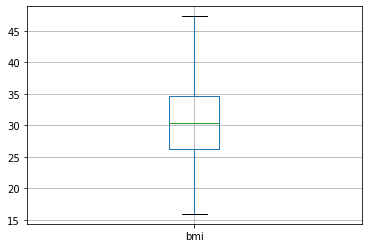

In [22]:
df[['bmi']].boxplot()

## 4. children

In [23]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

## 5. smoker

In [24]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['smoker'].replace({'yes':0, 'no':1},inplace=True)

In [26]:
smoker_col = {'yes':0, 'no':1}
smoker_col

{'yes': 0, 'no': 1}

## 6. region

In [27]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df = pd.get_dummies(df,columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0


## 7. charges

In [29]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

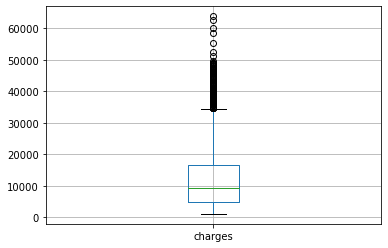

In [30]:
df[['charges']].boxplot()

In [31]:
q1 = df['charges'].quantile(0.25)
q2 = df['charges'].quantile(0.50)
q3 = df['charges'].quantile(0.75)

IQR = q3 - q1
m = df['charges'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail )
print(lower_tail)

34489.350562499996
-13109.1508975


In [34]:
df['charges'].loc[df['charges']>upper_tail]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

In [35]:
df['charges'].loc[df['charges']>upper_tail]=upper_tail

In [36]:
df['charges'].loc[df['charges']>upper_tail]

Series([], Name: charges, dtype: float64)

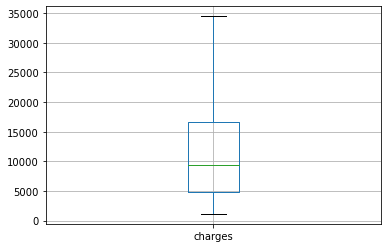

In [37]:
df[['charges']].boxplot()

## Feature Selection :

## Linearity :

In [38]:
r = df.corr()[['charges']]
r

,charges
age,0.313394
sex,0.052322
bmi,0.160996
children,0.073074
smoker,-0.785958
charges,1.000000
region_northeast,0.017236
region_northwest,-0.035204
region_southeast,0.059990
region_southwest,-0.044267


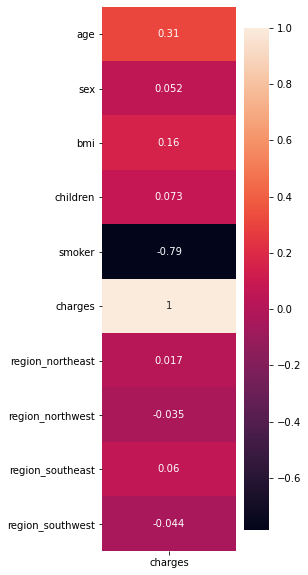

In [40]:
plt.figure(figsize=(3,10))
sns.heatmap(r,annot=True)

## Multicolinearity :

In [41]:
df1 = df.drop('charges',axis = 1)
df1.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0


In [44]:
vif_list = []

for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1.values,i)
    
    vif_list.append(vif)
    
print(vif_list)

[1.0174619308223147, 1.0087553624732213, 1.1064200096251202, 1.0040334014255625, 1.0120840759479972, 9.48327353416642, 9.605147947855574, 12.370064006795287, 10.19007042298484]


## Model Building :

In [45]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

## Model Evaluation :

In [50]:
# for testing 

mse = mean_squared_error(y_test,y_pred_test)

rmse = np.sqrt(mse)

mae_test = mean_absolute_error(y_test,y_pred_test)

acc = r2_score(y_test,y_pred_test)

print(mse)

print(rmse)

print(mae_test)

print('Testing Accuracy :',round(acc,2))

26968281.71164487
5193.099432096873
3522.5552399454
Testing Accuracy : 0.71


In [51]:
# for training data

mse = mean_squared_error(y_train,y_pred_train)

rmse = np.sqrt(mse)

mae_train = mean_absolute_error(y_train,y_pred_train)

acc = r2_score(y_train,y_pred_train)

print(mse)

print(rmse)

print(mae_train)

print('Training Accuracy :',round(acc,2))

25806959.883951202
5080.055106389222
3306.469234359973
Training Accuracy : 0.76


## Normality of Residual :

In [52]:
residual = y_train - y_pred_train
residual

1075   -1522.218490
761    -3126.477367
6      -1764.370121
1171   -6306.636618
127    -2279.668449
           ...     
580      753.417153
163    -1612.796910
607    -5478.306252
414    -2461.260201
971     -769.766270
Name: charges, Length: 1070, dtype: float64

## 1. KDE plot 

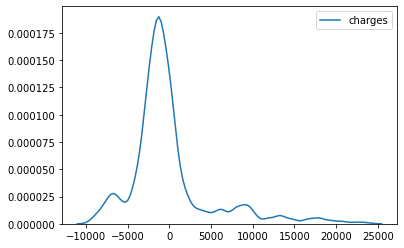

In [53]:
sns.kdeplot(residual)

## 2. QQplot :

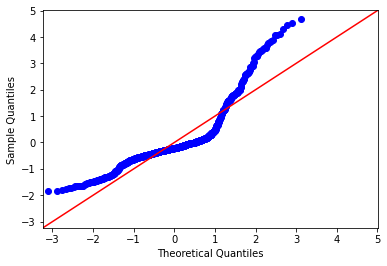

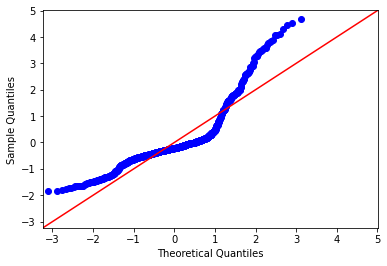

In [55]:
sm.qqplot(residual,line='45',fit=True)

## 3. Hypothesis testing :

#### 1. shapiro test 

In [56]:
_,p_value = shapiro(residual)

print('p_value :',p_value)

if p_value >= 0.05 :
    
    print('The Residual is Normally Diistributed ...')
    
else :
    
    print('The Residual is Not Normally Distributed....')

p_value : 2.677101323947402e-33
The Residual is Not Normally Distributed....


## 2. kstest 

In [57]:
_,p_value = kstest(residual,'norm')

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('The Residual is Normally Distributed...')
    
else :
    
    print('The Residual is Not Normally Distributed....')
    

p_value : 0.0
The Residual is Not Normally Distributed....


## 3. normaltest 

In [58]:
_,p_value = normaltest(residual)

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('The Residual is Normally Distributed...')
    
else :
    
    print('The Residual is Not Normally DIstributed...')
    

p_value : 1.0725900344498228e-87
The Residual is Not Normally DIstributed...


## Skewness :

In [59]:
skewness = residual.skew()

print('The skewness of Residual is :',skewness)

print()

if (skewness >= -0.5) & (skewness <= 0.5):
    
    print('Residual is Normally Distributed ...')
    
elif skewness < -0.05:
    
    print('There is Negatively Skewed Distribution of Residual...')
    
else :
    
    print('There is positively Skewed Distribution of Residual...')
    

The skewness of Residual is : 1.8307546335804743

There is positively Skewed Distribution of Residual...


## Homoscadasticity :

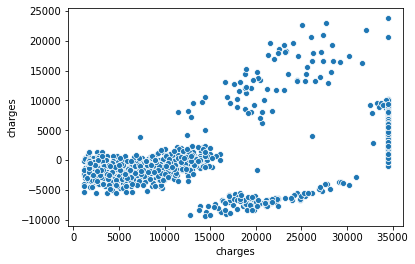

In [60]:
sns.scatterplot(x=y_train,y=residual)

## Dictionary Of Label Encoded Columns :

In [61]:
json_data = {'sex':sex_col,'smoker':smoker_col,'column_names':list(x.columns)}
json_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 0, 'no': 1},
 'column_names': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [62]:
# saving dictionary into json file

with open('Medical_Insurance.json','w') as f :
    json.dump(json_data,f)

In [65]:
# saving model into pickle file

with open('Medical_Insurance.pkl','wb') as f:
    pickle.dump(model,f)

### single User Input Testing :

In [66]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [67]:
age = 19.0
sex = 'female'
bmi = 27.9
children = 0.0
smoker = 'yes'

region = 'northeast'
region = 'region_'+ region
region_index = list(x.columns).index(region)

In [68]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
array[0] = age
array[1] = json_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = json_data['smoker'][smoker]
array[region_index] == 1
array

array([19. ,  0. , 27.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [76]:
predict = model.predict([array])[0]
print('Medical Charges is : Rs.',round(predict,2),'/-')

Medical Charges is : Rs. 23131.57 /-
